<a href="https://colab.research.google.com/github/Aggarwalmansi/GENAI/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models, layers

In [2]:
model = models.Sequential([
    layers.Dense(256,input_shape = (32,)),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,217 (67.25 KB)

 Trainable params: 17,217 (67.25 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer = 'adam',loss ='mse',metrics = ['accuracy'])

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Generate full random dataset
# X: 6000 samples, 32 features
X = np.random.rand(6000, 32)
# y: 6000 samples, output either 0 or 1
y = np.random.randint(0, 2, 6000)

print(f"Total X shape: {X.shape}")
print(f"Total y shape: {y.shape}")

Total X shape: (6000, 32)
Total y shape: (6000,)


In [6]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [7]:
# validation test , we will not touch the test set in between
X_train , X_val , y_train , y_val = train_test_split(X_train,y_train,test_size=0.2 , random_state=42)

In [8]:
model.fit(X_train , y_train ,epochs=20, validation_data=(X_val,y_val))

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4821 - loss: 0.3628 - val_accuracy: 0.5240 - val_loss: 0.2632
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4828 - loss: 0.2766 - val_accuracy: 0.5031 - val_loss: 0.2749
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4996 - loss: 0.2623 - val_accuracy: 0.5365 - val_loss: 0.2569
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5011 - loss: 0.2580 - val_accuracy: 0.5083 - val_loss: 0.2525
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5101 - loss: 0.2549 - val_accuracy: 0.5063 - val_loss: 0.2657
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5081 - loss: 0.2608 - val_accuracy: 0.5156 - val_loss: 0.2507
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5205 - loss: 0.2537 - val_accuracy: 0.5042 - val_loss: 0.2562
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 0.2521 - val_accuracy: 0

## Famous mnist dataset to recognicse the hand written digits

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Data loaded.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded.


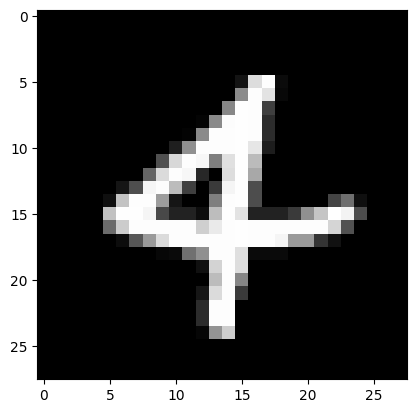

Label: 5


In [24]:
# Visualize a single digit
plt.imshow(X_train[150], cmap='gray')
plt.show()
print("Label:", y_train[0])

In [15]:
X_train_flat = X_train.reshape((-1,784))
X_test_flat = X_test.reshape((-1,784))

In [16]:

model = DecisionTreeClassifier()
model.fit(X_train_flat,y_train)


DecisionTreeClassifier()

In [17]:
y_pred = model.predict(X_test_flat)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.879

In [18]:
model1 = LogisticRegression()
model1.fit(X_train_flat,y_train)
y_pred1 = model1.predict(X_test_flat)
accuracy1 = accuracy_score(y_test,y_pred)
accuracy1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.879

In [25]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(10, activation='softmax') #We get probabilities of each digit, softmax helps us choose one of them
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Loss function for multiple classes
              metrics=['accuracy'])

In [26]:
model.fit(X_train_flat,y_train,epochs=10, batch_size = 64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7974 - loss: 1.0890
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9542 - loss: 0.2150
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9728 - loss: 0.1164
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.0774
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0547
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9910 - loss: 0.0394
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9926 - loss: 0.0308
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9948 - loss: 0.0223
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9952 - loss: 0.0198
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9966 - loss: 0.0148


In [27]:
from google.colab import files
from PIL import Image
import numpy as np

# 1. Upload the image
uploaded = files.upload()
filename = next(iter(uploaded)) # Gets the name of the file you just uploaded

# 2. Load and process the image
img = Image.open(filename).convert('L')  # Convert to grayscale (black and white)
img = img.resize((28, 28))               # Resize to 28x28 pixels
img_array = np.array(img)                # Turn into numbers

# 3. Invert colors (MNIST is white text on black background, but you likely wrote black on white)
img_array = 255 - img_array

# 4. Normalize and Flatten
img_array = img_array / 255.0            # Scale to 0-1
img_flat = img_array.reshape(1, 784)     # Flatten to (1, 784)

# 5. Predict
prediction = model.predict(img_flat)
print(f"I think you wrote a: {np.argmax(prediction)}")

Saving Screenshot 2026-02-04 at 10.03.03 AM.png to Screenshot 2026-02-04 at 10.03.03 AM.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
I think you wrote a: 8
